In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical,normalize
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from google.colab import files

In [2]:
data = []
labels = []
classes = 43
os.chdir(r'/content/drive/MyDrive')
cur_path = os.getcwd()
print(cur_path)

/content/drive/MyDrive


In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = Image.open(path + '//'+ img)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Ошибка")

In [4]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)

(39649, 32, 32, 3) (39649,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, 
                                                    random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31719, 32, 32, 3) (7930, 32, 32, 3) (31719,) (7930,)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31719, 32, 32, 3) (7930, 32, 32, 3) (31719,) (7930,)


In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
model = Sequential()

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=0.3)

In [9]:
epochs =10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
992/992 [==============================] - 177s 178ms/step - loss: 1.7299 - accuracy: 0.5629 - val_loss: 0.3728 - val_accuracy: 0.9119
Epoch 2/10
992/992 [==============================] - 171s 173ms/step - loss: 0.5083 - accuracy: 0.8517 - val_loss: 0.1552 - val_accuracy: 0.9595
Epoch 3/10
992/992 [==============================] - 171s 173ms/step - loss: 0.3327 - accuracy: 0.9026 - val_loss: 0.0957 - val_accuracy: 0.9729
Epoch 4/10
992/992 [==============================] - 171s 173ms/step - loss: 0.2736 - accuracy: 0.9194 - val_loss: 0.0841 - val_accuracy: 0.9769
Epoch 5/10
992/992 [==============================] - 170s 172ms/step - loss: 0.2354 - accuracy: 0.9329 - val_loss: 0.0980 - val_accuracy: 0.9736
Epoch 6/10
992/992 [==============================] - 171s 173ms/step - loss: 0.2278 - accuracy: 0.9346 - val_loss: 0.0660 - val_accuracy: 0.9807
Epoch 7/10
992/992 [==============================] - 172s 173ms/step - loss: 0.2157 - accuracy: 0.9387 - val_loss: 0.0542 -

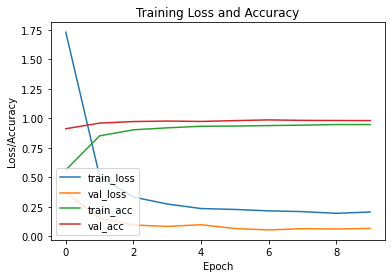

In [10]:
# plt.style.use("plot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

16
1
38
33
11
38
18
12
25
35


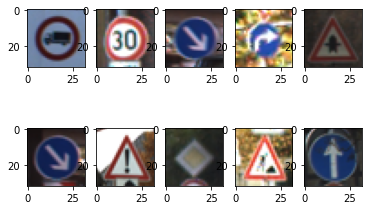

In [44]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values[:10]
imgs = y_test["Path"].values[:10]
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_on_batch(X_test)
i = 0
fig, axes = plt.subplots(2,5)
for el in pred:
  print(np.argmax(el))
  axes[i//5,i - (i//5)*5].imshow(data[i])
  i += 1
#Accuracy with the test data
from sklearn.metrics import accuracy_score
# print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

In [24]:
import

NameError: ignored